In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [4]:
import os, sys

In [5]:
SUBDIR='./data/'

In [6]:
# get the current directory and files inside 
print(os.getcwd()); print(os.listdir( SUBDIR ));

/home/topolo/PropD/servetheloop/passiveSkis
['Updated Halbach 4x2x2 ski at each end.xls', 'ski-eval.xlsx.xlsx', 'ski-eval.xlsx', 'ski-eval-2d.xlsx']


In [17]:
UpdatedHalbach040202ends = pd.read_excel(SUBDIR+"Updated Halbach 4x2x2 ski at each end.xls")

In [18]:
skieval_edit = pd.read_excel(SUBDIR+"ski-eval.xlsx.xlsx")

In [19]:
skieval = pd.read_excel(SUBDIR+"ski-eval.xlsx")

In [20]:
skieval2d = pd.read_excel(SUBDIR+"ski-eval-2d.xlsx")

In [21]:
skieval_edit

,"2in deep, 1in high",Unnamed: 1,adjusted for comparison,Unnamed: 3,Unnamed: 4,Unnamed: 5,simulation result,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,m/s,inch,drag,lift,lift/drag,NaN,drag,lift,NaN,NaN,NaN
1,10,1,116,130,1.12069,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2,163.5,231,1.41284,NaN,327,462,NaN,NaN,NaN
3,NaN,3,147,226.667,1.54195,NaN,441,680,NaN,NaN,NaN
4,NaN,5,100.2,169,1.68663,NaN,501,845,NaN,NaN,NaN
5,NaN,8,57.375,107.625,1.87582,NaN,459,861,NaN,NaN,NaN
6,50,1,96,270,2.8125,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,2,98,387.5,3.95408,NaN,196,775,NaN,NaN,NaN
8,NaN,3,75,358.333,4.77778,NaN,225,1075,NaN,NaN,NaN
9,NaN,5,45.8,266,5.80786,NaN,229,1330,NaN,NaN,NaN


I believe some preprocessing to remove elements or comments that don't "fit" a table would help.  

Manually, I copied and pasted spreadsheet cells with only tables and saved them as new files.  Then I will load those.  

In [28]:
skieval2d_periodic = pd.read_excel(SUBDIR+"ski-eval_2d_periodic_abridged.xlsx")

In [29]:
skieval2d_periodic

,m/s,inch,drag,lift,lift/drag,drag.1,lift.1
0,10,1,116.000000,130.000000,1.120690,NaN,NaN
1,10,2,163.500000,231.000000,1.412844,327.0,462.0
2,10,3,147.000000,226.666667,1.541950,441.0,680.0
3,10,5,100.200000,169.000000,1.686627,501.0,845.0
4,10,8,57.375000,107.625000,1.875817,459.0,861.0
5,50,1,96.000000,270.000000,2.812500,NaN,NaN
6,50,2,98.000000,387.500000,3.954082,196.0,775.0
7,50,3,75.000000,358.333333,4.777778,225.0,1075.0
8,50,5,45.800000,266.000000,5.807860,229.0,1330.0
9,50,8,26.375000,177.500000,6.729858,211.0,1420.0


Then I can immediately make some quick plots.  For instance, for each width in inch, I can plot drag or lift vs. velocity (m/s):

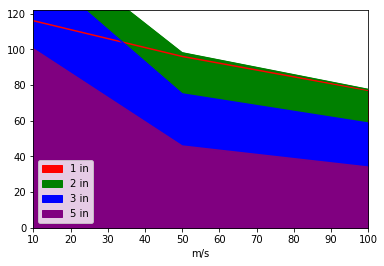

In [39]:
ax1 = skieval2d_periodic.ix[skieval2d_periodic['inch']==1].plot.area(x="m/s",y="drag",color="Red",label="1 in")

ax2 = skieval2d_periodic.ix[skieval2d_periodic['inch']==2].plot.area(x="m/s",y="drag",color="Green",label="2 in",ax=ax1)

ax3 = skieval2d_periodic.ix[skieval2d_periodic['inch']==3].plot.area(x="m/s",y="drag",color="Blue",label="3 in",ax=ax2)

ax5 = skieval2d_periodic.ix[skieval2d_periodic['inch']==5].plot.area(x="m/s",y="drag",color="Purple",label="5 in",ax=ax3)

In [33]:
skieval2d_periodic.ix[skieval2d_periodic['inch']==1]["lift"]

0     130.0
5     270.0
10    316.0
Name: lift, dtype: float64